In [ ]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from glob import glob

### **Load the Image Data**

In [ ]:
images=glob("/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/*.jpg")

In [ ]:
len(images)

16393

In [ ]:
img2=glob("/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-2/*.jpg")

In [ ]:
len(img2)

6890

In [ ]:
img3=glob("/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-3/*.jpg")

In [ ]:
len(img3)

7662

In [ ]:
images[:5]

['/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/hhdoeK8SsiI.002.mp4-00161.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/xHsh2Rg5ANU.000.mp4-00081.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/rxYWgXYTATs.001.mp4-00161.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/V8w2Lo5wxl8.000.mp4-00161.jpg',
 '/content/drive/MyDrive/data/personality-master/dataset/portrait-personality-1/leslBYwG8kc.002.mp4-00001.jpg']

### **load the Text Data**

In [ ]:
text=pd.read_csv("/content/drive/MyDrive/data/personality-master/dataset/bigfive_labels.csv")

In [ ]:
text

,VideoName,ValueExtraversion,ValueAgreeableness,ValueConscientiousness,ValueNeurotisicm,ValueOpenness
0,GQczMGrVgbc.001.mp4,0.570093,0.703297,0.640777,0.666667,0.544444
1,-utrsarZeIY.004.mp4,0.523364,0.516484,0.436893,0.333333,0.411111
2,3HA2W1s4oP8.001.mp4,0.401869,0.538462,0.427184,0.510417,0.388889
3,hM96SfN5_F4.004.mp4,0.485981,0.637363,0.359223,0.458333,0.566667
4,SgzOYog1pH4.003.mp4,0.532710,0.527473,0.650485,0.458333,0.477778
...,...,...,...,...,...,...
7995,FkzVX7SQ9wE.000.mp4,0.579439,0.648352,0.689320,0.739583,0.733333
7996,EiXQ9RErt6c.001.mp4,0.299065,0.373626,0.407767,0.260417,0.288889
7997,DSYiLCGNDP0.003.mp4,0.392523,0.373626,0.524272,0.395833,0.600000
7998,RGuHfwIRKpA.005.mp4,0.336449,0.604396,0.747573,0.614583,0.533333


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
incept_model=ResNet50(include_top=True)
incept_model.layers[-2]
last_layer=incept_model.layers[-2].output
my_model=Model(inputs=incept_model.input,outputs=last_layer)
my_model.summary()

102967424/102967424 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                           

In [ ]:
images_features={}
all_prob_EACNO={}

In [ ]:
count=0
for i in images:
    j=i.split("/")[-1].split("-")[0]
    for k in range(len(text)):
        if j==text["VideoName"][k]:
            if j not in images_features:
                img=cv2.imread(i)
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img=cv2.resize(img,(224,224))
                img=img.reshape(1,224,224,3)

                pred=my_model.predict(img).reshape(2048,)
                images_features[j]=pred
                all_prob_EACNO[j]=[text["ValueExtraversion"][k],text["ValueAgreeableness"][k],text["ValueConscientiousness"][k],text["ValueNeurotisicm"][k],text["ValueOpenness"][k]]
                count=count+1
    if count%100==0:
        print(count)

1/1 [==============================] - 0s 19ms/step
100
1/1 [==============================] - 0s 20ms/step
200
1/1 [==============================] - 0s 20ms/step
300
1/1 [==============================] - 0s 21ms/step
400
1/1 [==============================] - 0s 19ms/step
500
1/1 [==============================] - 0s 21ms/step
600
1/1 [==============================] - 0s 20ms/step
700
700
700
1/1 [==============================] - 0s 22ms/step
800
800
1/1 [==============================] - 0s 21ms/step
900
900
900
1/1 [==============================] - 0s 20ms/step
1000
1000
1/1 [==============================] - 0s 20ms/step
1100
1/1 [==============================] - 0s 20ms/step
1200
1200
1/1 [==============================] - 0s 20ms/step
1300
1/1 [==============================] - 0s 22ms/step
1400
1/1 [==============================] - 0s 20ms/step
1500
1/1 [==============================] - 0s 21ms/step
1600
1600
1600
1/1 [==============================] - 0s 20ms/step
1700


In [ ]:
images_features

{'hhdoeK8SsiI.002.mp4': array([0.03894245, 2.2091632 , 0.18186377, ..., 0.29328287, 0.363872  ,
        0.41139108], dtype=float32),
 'xHsh2Rg5ANU.000.mp4': array([0.3859043 , 0.46416116, 0.08461637, ..., 0.03265477, 0.06477441,
        0.6742599 ], dtype=float32),
 'rxYWgXYTATs.001.mp4': array([0.30148932, 0.72250473, 0.04167573, ..., 0.04052773, 0.023908  ,
        0.        ], dtype=float32),
 'V8w2Lo5wxl8.000.mp4': array([0.6484582 , 1.3212465 , 0.03716446, ..., 0.05236118, 0.09887434,
        0.20482074], dtype=float32),
 'leslBYwG8kc.002.mp4': array([0.24324907, 0.08715918, 0.14304866, ..., 0.02374945, 0.00940238,
        0.33463973], dtype=float32),
 'ogSLrHVeqLI.003.mp4': array([0.16095372, 0.07199975, 0.15077968, ..., 0.510733  , 0.29225758,
        0.545354  ], dtype=float32),
 'ySEeioc339E.004.mp4': array([0.28572202, 0.55684084, 0.04075009, ..., 0.12604828, 0.        ,
        0.7642652 ], dtype=float32),
 '5hFRSHAis2E.003.mp4': array([0.3740729 , 0.06407473, 0.07524398, ..

In [ ]:
len(images_features)

3593

In [ ]:
all_prob_EACNO

{'hhdoeK8SsiI.002.mp4': [0.4672897196261682,
  0.5164835164835165,
  0.4368932038834951,
  0.3333333333333333,
  0.5333333333333333],
 'xHsh2Rg5ANU.000.mp4': [0.2710280373831776,
  0.4835164835164835,
  0.29126213592233,
  0.2916666666666666,
  0.3444444444444444],
 'rxYWgXYTATs.001.mp4': [0.6355140186915887,
  0.6373626373626373,
  0.4660194174757281,
  0.7395833333333331,
  0.6888888888888888],
 'V8w2Lo5wxl8.000.mp4': [0.4392523364485981,
  0.5494505494505493,
  0.5922330097087379,
  0.5416666666666666,
  0.611111111111111],
 'leslBYwG8kc.002.mp4': [0.588785046728972,
  0.7142857142857143,
  0.5145631067961165,
  0.59375,
  0.5777777777777777],
 'ogSLrHVeqLI.003.mp4': [0.4859813084112149,
  0.5054945054945054,
  0.4951456310679611,
  0.4791666666666666,
  0.5777777777777777],
 'ySEeioc339E.004.mp4': [0.4766355140186916,
  0.5054945054945054,
  0.4271844660194174,
  0.4479166666666666,
  0.5],
 '5hFRSHAis2E.003.mp4': [0.5046728971962617,
  0.5604395604395604,
  0.4466019417475727,
  0

In [ ]:
count=0
for i in img2:
    j=i.split("/")[-1].split("-")[0]
    for k in range(len(text)):
        if j==text["VideoName"][k]:
            if j not in images_features:
                img=cv2.imread(i)
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img=cv2.resize(img,(224,224))
                img=img.reshape(1,224,224,3)

                pred=my_model.predict(img).reshape(2048,)
                images_features[j]=pred
                all_prob_EACNO[j]=[text["ValueExtraversion"][k],text["ValueAgreeableness"][k],text["ValueConscientiousness"][k],text["ValueNeurotisicm"][k],text["ValueOpenness"][k]]
                count=count+1
    if count%100==0:
        print(count)

1/1 [==============================] - 0s 25ms/step
100
1/1 [==============================] - 0s 20ms/step
200
1/1 [==============================] - 0s 21ms/step
300
300
1/1 [==============================] - 0s 21ms/step
400
1/1 [==============================] - 0s 23ms/step
500
1/1 [==============================] - 0s 20ms/step
600
600
600
600
1/1 [==============================] - 0s 21ms/step
700
700
700
1/1 [==============================] - 0s 21ms/step
800
800
800
800
800
800
800
1/1 [==============================] - 0s 20ms/step
900
900
1/1 [==============================] - 0s 21ms/step
1000
1/1 [==============================] - 0s 27ms/step
1100
1100
1/1 [==============================] - 0s 20ms/step
1200
1200
1200
1/1 [==============================] - 0s 19ms/step
1300
1300
1300
1300
1/1 [==============================] - 0s 21ms/step
1400
1400
1400
1400
1400
1400
1/1 [==============================] - 0s 24ms/step
1500
1500
1500
1500
1/1 [===========================

In [ ]:
len(images_features)

5122

In [ ]:
count=0
for i in img3:
    j=i.split("/")[-1].split("-")[0]
    for k in range(len(text)):
        if j==text["VideoName"][k]:
            if j not in images_features:
                img=cv2.imread(i)
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                img=cv2.resize(img,(224,224))
                img=img.reshape(1,224,224,3)

                pred=my_model.predict(img).reshape(2048,)
                images_features[j]=pred
                all_prob_EACNO[j]=[text["ValueExtraversion"][k],text["ValueAgreeableness"][k],text["ValueConscientiousness"][k],text["ValueNeurotisicm"][k],text["ValueOpenness"][k]]
                count=count+1
    if count%100==0:
        print(count)

1/1 [==============================] - 0s 20ms/step
100
1/1 [==============================] - 0s 20ms/step
200
1/1 [==============================] - 0s 20ms/step
300
1/1 [==============================] - 0s 22ms/step
400
400
1/1 [==============================] - 0s 20ms/step
500
1/1 [==============================] - 0s 20ms/step
600
1/1 [==============================] - 0s 20ms/step
700
700
1/1 [==============================] - 0s 19ms/step
800
1/1 [==============================] - 0s 22ms/step
900
900
900
900
900
900
900
900
1/1 [==============================] - 0s 20ms/step
1000
1000
1/1 [==============================] - 0s 21ms/step
1100
1/1 [==============================] - 0s 22ms/step
1200
1200
1200
1/1 [==============================] - 0s 19ms/step
1300
1300
1300
1300
1/1 [==============================] - 0s 19ms/step
1400
1400
1/1 [==============================] - 0s 27ms/step
1500
1500
1500
1500
1500
1500
1/1 [==============================] - 0s 20ms/step
1600
1

In [ ]:
len(images_features)

6837

In [ ]:
len(all_prob_EACNO)

6837

In [ ]:
np.save("iamges_feature.npy",images_features)

In [ ]:
np.save("all_prob_EACNO.npy",all_prob_EACNO)

In [ ]:
images_features={}

In [ ]:
images_features=np.load("/content/drive/MyDrive/data/personality-master/dataset/imgprob/iamges_feature.npy",allow_pickle=True)

In [ ]:
images_features=images_features.item()

In [ ]:
len(images_features)

6837

In [ ]:
all_prob_EACNO=np.load("/content/drive/MyDrive/data/personality-master/dataset/imgprob/all_prob_EACNO.npy",allow_pickle=True)

In [ ]:
all_prob_EACNO=all_prob_EACNO.item()

In [ ]:
len(all_prob_EACNO)

6837

In [ ]:
def generator(img,prob):
    x=[]
    y=[]
    for k,v in prob.items():
        x.append(img[k])
        y.append(v)
    return x,y

In [ ]:
x,y=generator(images_features,all_prob_EACNO)

In [ ]:
X = np.array(x)

In [ ]:
y=np.array(y)

In [ ]:
import tensorflow

In [ ]:
image_model=tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(128,input_shape=(2048,),activation="relu"),
    tensorflow.keras.layers.RepeatVector(256)
])
image_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 256, 128)         0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conca=tensorflow.keras.layers.Concatenate()([image_model.output])

In [ ]:
x=tensorflow.keras.layers.LSTM(128,return_sequences=True)(conca)
x=tensorflow.keras.layers.LSTM(512,return_sequences=False)(x)
x=tensorflow.keras.layers.Dense(5)(x)
out=tensorflow.keras.layers.Activation("softmax")(x)
model=tensorflow.keras.models.Model(inputs=[image_model.input], outputs=out)
model.compile(loss="categorical_crossentropy", optimizer="RMSprop",metrics=["accuracy"])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2_input (InputLayer)  [(None, 2048)]            0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 repeat_vector_1 (RepeatVect  (None, 256, 128)         0         
 or)                                                             
                                                                 
 concatenate_1 (Concatenate)  (None, 256, 128)         0         
                                                                 
 lstm_2 (LSTM)               (None, 256, 128)          131584    
                                                                 
 lstm_3 (LSTM)               (None, 512)               1312768   
                                                           

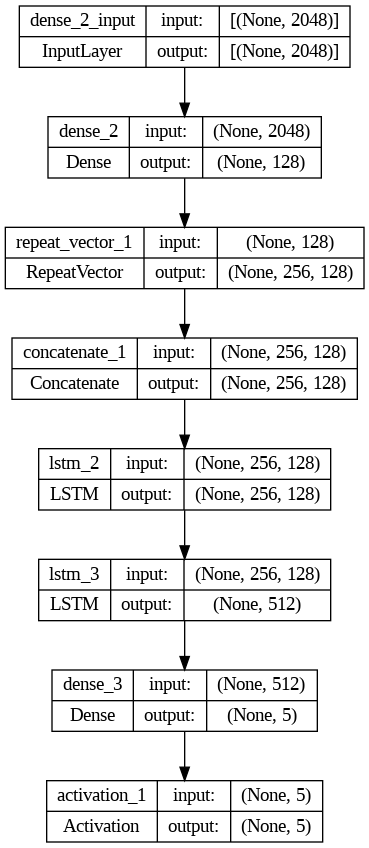

In [ ]:
tensorflow.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
model.fit(X,y,epochs=5)

Epoch 1/5
214/214 [==============================] - 9s 43ms/step - loss: 4.2610 - accuracy: 0.3559
Epoch 2/5
214/214 [==============================] - 9s 43ms/step - loss: 4.2558 - accuracy: 0.3572
Epoch 3/5
214/214 [==============================] - 9s 43ms/step - loss: 4.2528 - accuracy: 0.3578
Epoch 4/5
214/214 [==============================] - 9s 43ms/step - loss: 4.2507 - accuracy: 0.3578
Epoch 5/5
214/214 [==============================] - 9s 43ms/step - loss: 4.2495 - accuracy: 0.3578


In [ ]:
def pred(im):
    test_img=cv2.imread(im[0])
    test_img=cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    lol=cv2.resize(test_img,(224,224))
    lol=np.reshape(lol,(1,224,224,3))
  
    test_feature=my_model.predict(lol).reshape(1,2048)
    prediction=model.predict(test_feature)
    return prediction

In [ ]:
img_name=glob("/content/drive/MyDrive/Photo /Porvi/919098821805_status_69159644a78b4d78a18304b5dc28fa93.jpg")

In [ ]:
pred(img_name)

1/1 [==============================] - 0s 31ms/step


array([[0.17736362, 0.20740971, 0.19123815, 0.18285978, 0.24112873]],
      dtype=float32)